In [2]:
from utils.binaries import *
from utils.plotting import *

10:58:03 (+11607.2s) [INFO   ] -- import logging
10:58:03 (  +202ms) [INFO   ] -- import numpy as np
10:58:03 (    +8ms) [INFO   ] -- import uncertainties
10:58:04 (  +407ms) [INFO   ] -- import pandas as pd
10:58:04 (    +2ms) [WARNING] -- pandas support to be dropped at some point!
10:58:04 (    +2ms) [INFO   ] -- import binaries.tools as tools
10:58:04 (  +357ms) [INFO   ] -- import matplotlib.pyplot as plt
10:58:05 (  +587ms) [INFO   ] -- import seaborn as so
10:58:05 (    +2ms) [INFO   ] -- import plotting.tools as plot
10:58:05 (   +11ms) [DEBUG  ] -- font size set to 9.5
10:58:05 (    +1ms) [DEBUG  ] -- label size set to 13.0
10:58:05 (    +0ms) [DEBUG  ] -- figure size set to [6.6, 3.3]
10:58:05 (    +1ms) [DEBUG  ] -- markersize set to 2.0
10:58:05 (    +1ms) [DEBUG  ] -- usetex set to False


Text(0.5, 0, 'time after DAQ start / h')

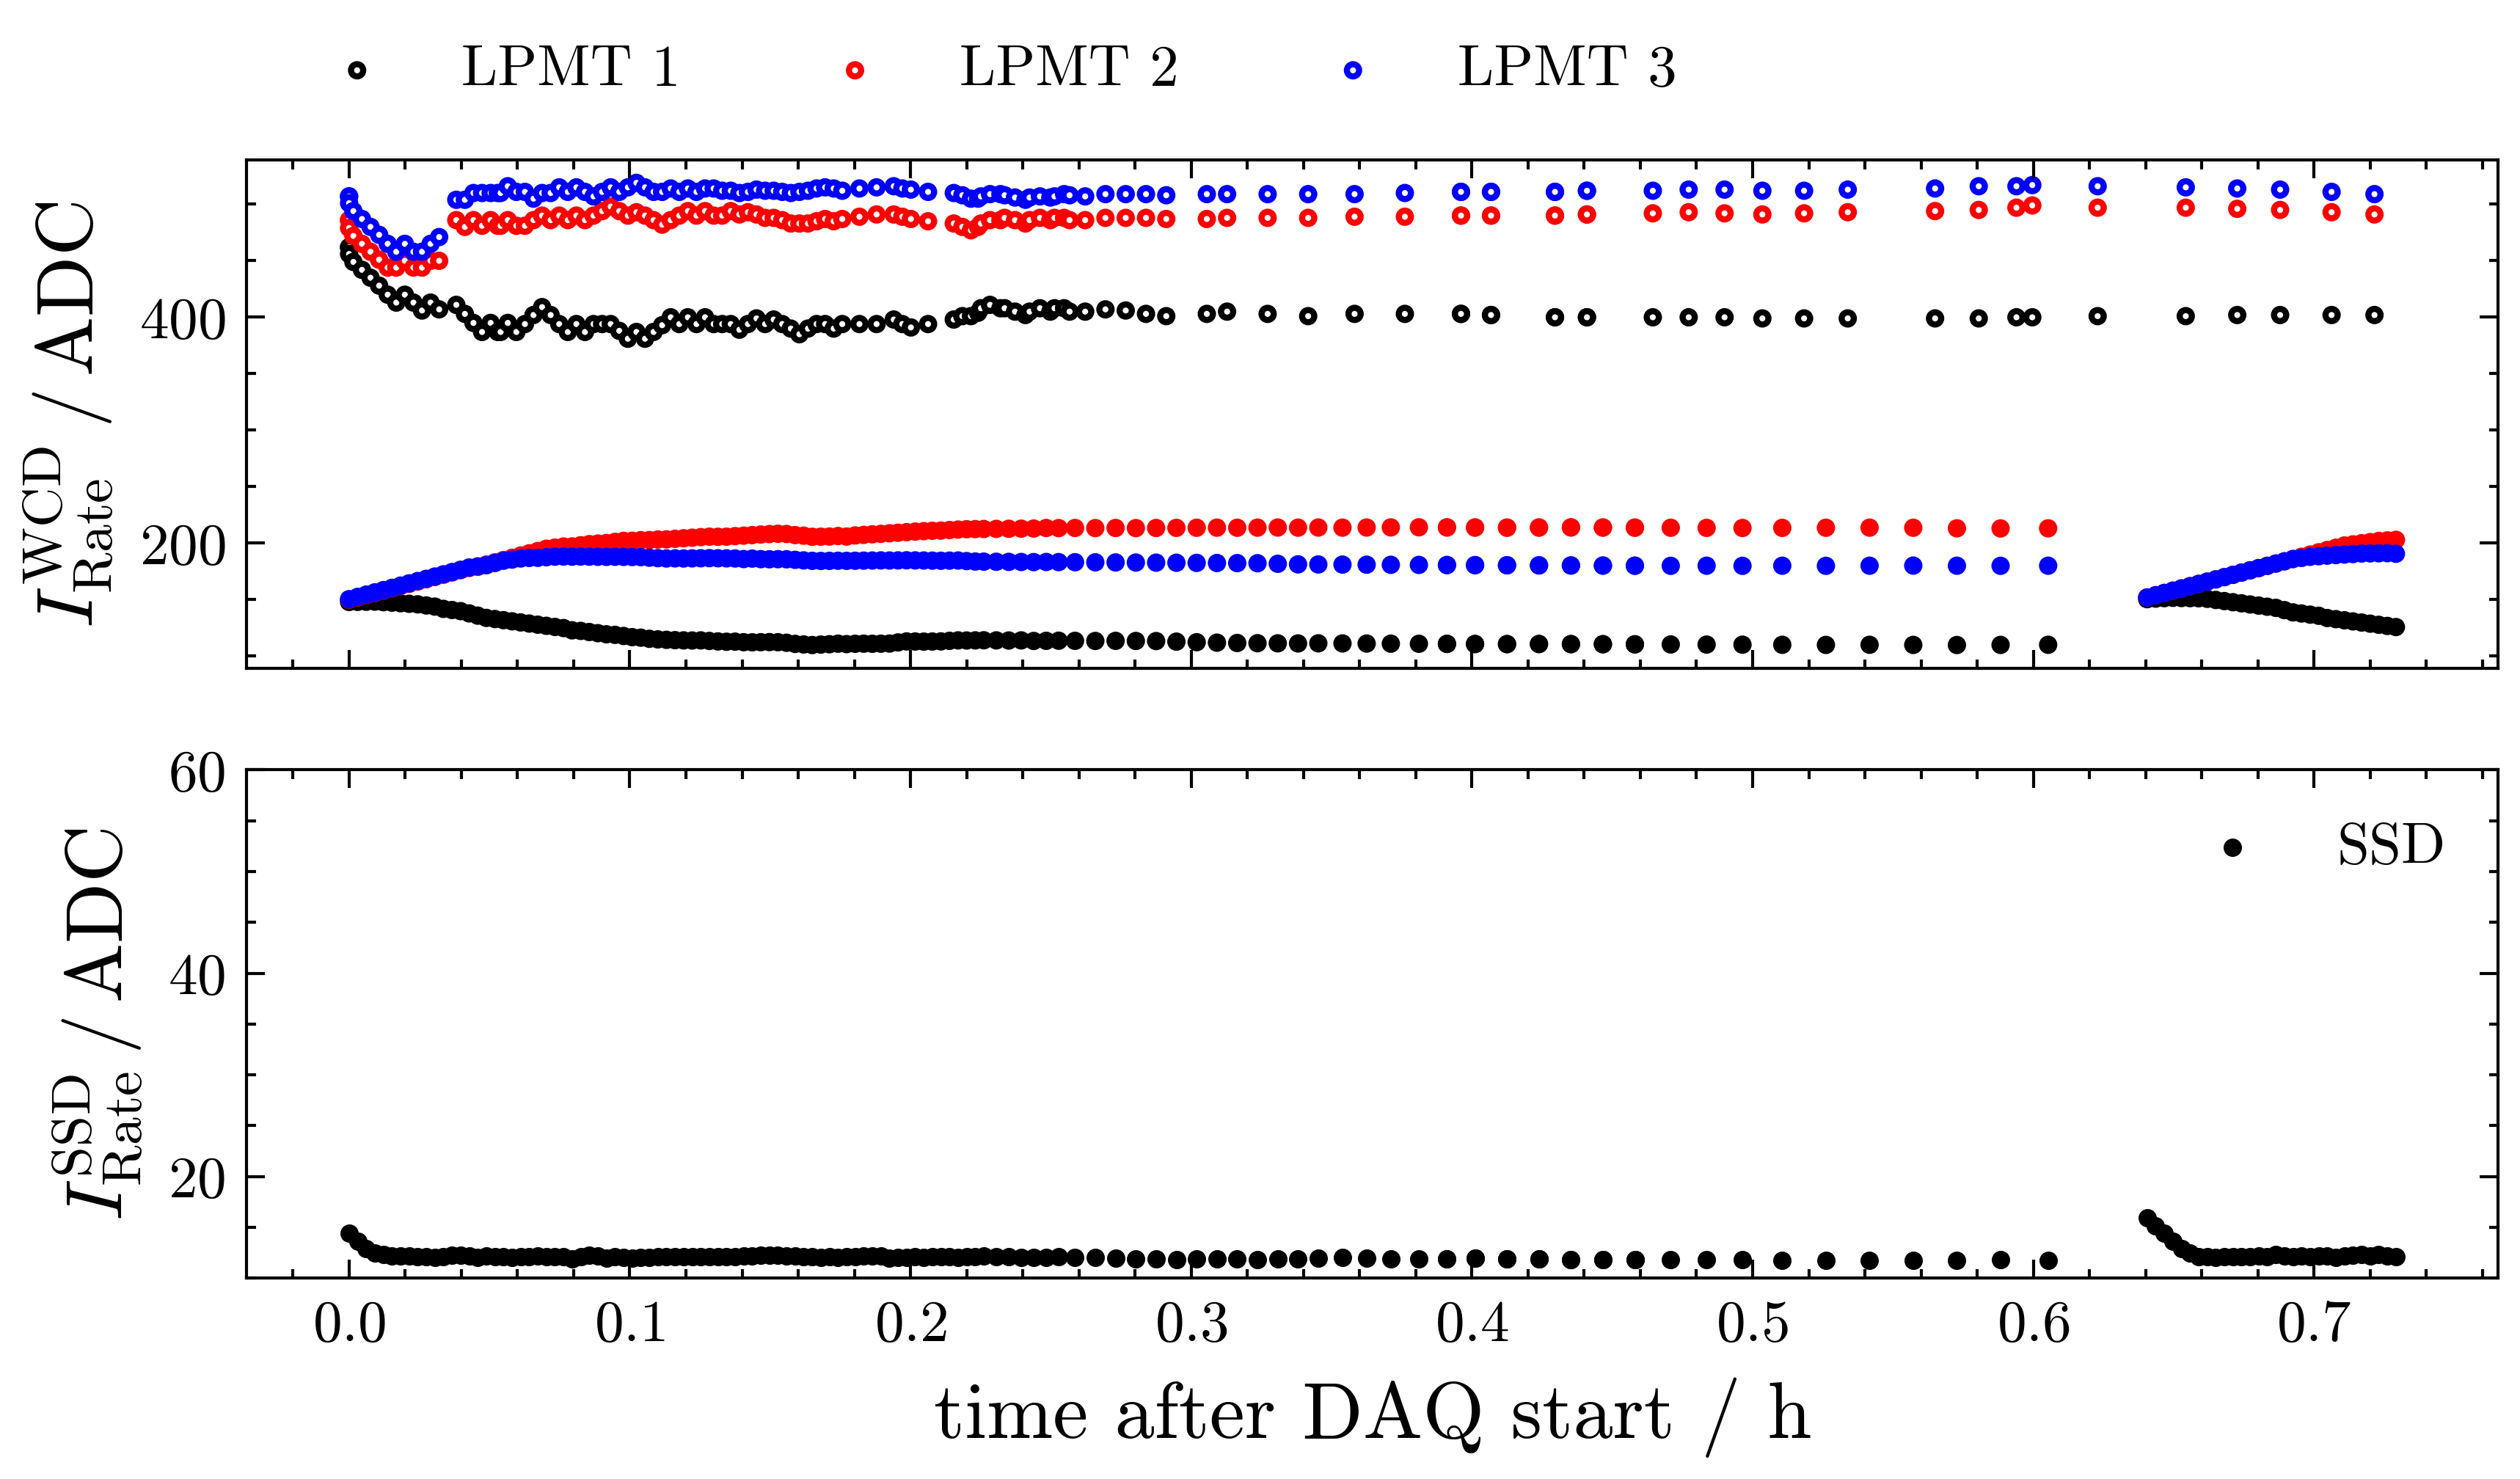

In [26]:
t, wcd1, wcd2, wcd3, ssd = np.loadtxt('/cr/data01/filip/Data/daqIntegrationTests/v12/calib.test', unpack=True)

nan_mask = np.isnan(t)
fck = ["w" if x else "k" for x in nan_mask]
fcr = ["w" if x else "r" for x in nan_mask]
fcb = ["w" if x else "b" for x in nan_mask]
t[nan_mask] = np.interp(np.flatnonzero(nan_mask), np.flatnonzero(~nan_mask), t[~nan_mask])
ssd  /= 2.64 * 10
# wcd1[nan_mask] /= 1.75
# wcd2[nan_mask] /= 1.75
# wcd3[nan_mask] /= 1.75
wcd1[~nan_mask] /= 10
wcd2[~nan_mask] /= 10
wcd3[~nan_mask] /= 10
t = (t - t[0]) / 3600

skip = 1
stop = -1
fig, (ax1, ax2) = plt.subplots(2, 1, sharex=True)
ax1.scatter(t[:stop:skip], wcd1[:stop:skip], fc=fck[:stop:skip], ec='k', label="LPMT 1")
ax1.scatter(t[:stop:skip], wcd2[:stop:skip], fc=fcr[:stop:skip], ec='r', label="LPMT 2")
ax1.scatter(t[:stop:skip], wcd3[:stop:skip], fc=fcb[:stop:skip], ec='b', label="LPMT 3")
ax2.scatter(t[:stop:skip], ssd[:stop:skip], label="SSD")
ax2.legend()

ax2.set_ylim(10, 60)
ax1.legend(bbox_to_anchor=(0, 1.02,1,0.2), loc="lower left", ncol=3)
ax1.set_ylabel("$I^\mathrm{WCD}_\mathrm{Rate}\,/\,\mathrm{ADC}$")
ax2.set_ylabel("$I^\mathrm{SSD}_\mathrm{Rate}\,/\,\mathrm{ADC}$")
ax2.set_xlabel("time after DAQ start / h")